<a href="https://colab.research.google.com/github/AnanyaKodali/MAT-494/blob/main/3_2_Continunity_and_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.2: Continunity and Differentiation**

**Introduction**

Calculus is a fundamental branch of mathematics that deals with continuous change. Limits, Continuity, Derivatives, and Taylor’s Theorem are cornerstone concepts in calculus, providing the tools necessary for analyzing and modeling dynamic systems. These concepts not only form the foundation of mathematical analysis but also play a crucial role in various applications within data science, such as optimization, predictive modeling, and error analysis.

**Practical Application**
1. Predictive Modeling: Utilizing derivatives for optimizing loss functions in machine learning algorithms.
2. Numerical Optimization: Employing limits and derivatives to find minima and maxima of functions.
3. Error Analysis: Applying Taylor’s theorem to estimate and bound errors in numerical methods.
4. Data Fitting: Ensuring smoothness and continuity in regression models through continuity and differentiability.
5. Algorithm Development: Designing algorithms that rely on smooth functions and their properties for convergence and stability.

**Example 3.2.1: Centralized Dataset**

For practical implementations across all subsections, we will analyze the following symbolic and numerical functions:
1. $f_1(x) = \frac{1}{x}$
2. $f_2(x) = \frac{\sin(x)}{x}$
3. $f_3(x) = \ln(x)$
4. $f_4(x) = x^2$
5. $f_5(x) = e^x$
6. $f_6(x) = x^3 - 22x^2 - 4x$

These functions will be used to demonstrate limits, continuity, derivatives, and Taylor series approximations.

##**3.2.1: Limits and Continuity**

**Definition 3.2.1**

For a function $f(x)$, the limit $𝐿$ as $𝑥$ approaches $𝑎$ is defined as:
* $\lim_{x \to a} f(x) = L$

This means that as $𝑥$  gets arbitrarily close to $𝑎$, $f(x)$ approaches $𝐿$.

**Definition 3.2.2**

Conditions for a Limit to Exist:
1. Left-Hand Limit (LHL): $\lim_{x \to a^-} f(x)$ exists
2. Right-Hand Limit (RHL): $\lim_{x \to a^+} f(x)$ exists
3. Equality: $\lim_{x \to a^-} f(x) = \lim_{x \to a^+} f(x) = L$

If all three conditions are satisfied, the limit $\lim_{x \to a} f(x) = L$ exists.

**Definition 3.2.3**

Continuity: A function $f(x)$ is continuous at $x=a$ if:
* $\lim_{x \to a} f(x) = f(a)$

In other words, the function has no interruptions, jumps, or holes at $x = a$


**Mathematical Intuition 3.2.4**

*Key Theorems:*
1. Extreme Value Theorem:
* Statement: If $f(x)$ is continuous on a closed and bounded interval $[a,b]$, then $f(x)$ attains both a maximum and a minimum value on that interval.
* Implication: Ensures that optimization problems have solutions within certain domains.


2. Composition of Continuous Functions:
* Statement: If $f(x)$ and $g(x)$ are continuous at $x=a$, then the composition $h(x) = f(g(x))$ is also continuous at $x=a$
* Implication: Allows building complex continuous functions from simpler ones.


**Example 3.2.1: Symbolic Limit Calculations**

Objective: Use SymPy, a Python library for symbolic mathematics, to compute limits from the centralised dataset symbolically.

In [1]:
# Symbolic Limit Calculations using SymPy
from sympy import symbols, limit, sin, cos, ln, oo

# Define symbolic variable
x = symbols('x')

# Define functions
functions = {
    "f1(x) = 1/x": 1/x,
    "f2(x) = sin(x)/x": sin(x)/x,
    "f3(x) = ln(x)": ln(x),
    "f4(x) = x**2": x**2,
}

# Compute symbolic limits
for name, func in functions.items():
    print(f"\n{name}:")
    try:
        limit_at_0 = limit(func, x, 0)
        print(f"  Limit as x -> 0: {limit_at_0}")
    except Exception as e:
        print(f"  Limit as x -> 0: Undefined ({e})")
    print(f"  Limit as x -> ∞: {limit(func, x, oo)}")
    print(f"  Limit as x -> -∞: {limit(func, x, -oo)}")


f1(x) = 1/x:
  Limit as x -> 0: oo
  Limit as x -> ∞: 0
  Limit as x -> -∞: 0

f2(x) = sin(x)/x:
  Limit as x -> 0: 1
  Limit as x -> ∞: 0
  Limit as x -> -∞: 0

f3(x) = ln(x):
  Limit as x -> 0: -oo
  Limit as x -> ∞: oo
  Limit as x -> -∞: oo

f4(x) = x**2:
  Limit as x -> 0: 0
  Limit as x -> ∞: oo
  Limit as x -> -∞: oo


**Example 3.2.1: Continuity Testing**

Objective: Test the continuity of $f_1(x) = \frac{1}{x}$ at $x = 0$ using symbolic limits.

In [2]:
# Continuity Testing for f1(x) = 1/x at x = 0
from sympy import S

# Define symbolic variable
x = symbols('x')

# Define function
f1 = 1/x

# Compute left-hand and right-hand limits at x=0
left_limit = limit(f1, x, 0, dir='-')
right_limit = limit(f1, x, 0, dir='+')

print(f"Left-hand limit as x -> 0: {left_limit}")
print(f"Right-hand limit as x -> 0: {right_limit}")

# Check continuity
if left_limit == right_limit and left_limit == f1.subs(x, 0):
    print("f1(x) is continuous at x = 0")
else:
    print("Discontinuity detected: f1(x) is undefined at x = 0")

Left-hand limit as x -> 0: -oo
Right-hand limit as x -> 0: oo
Discontinuity detected: f1(x) is undefined at x = 0


**Example 3.2.1: Continuity Testing Visualisation**

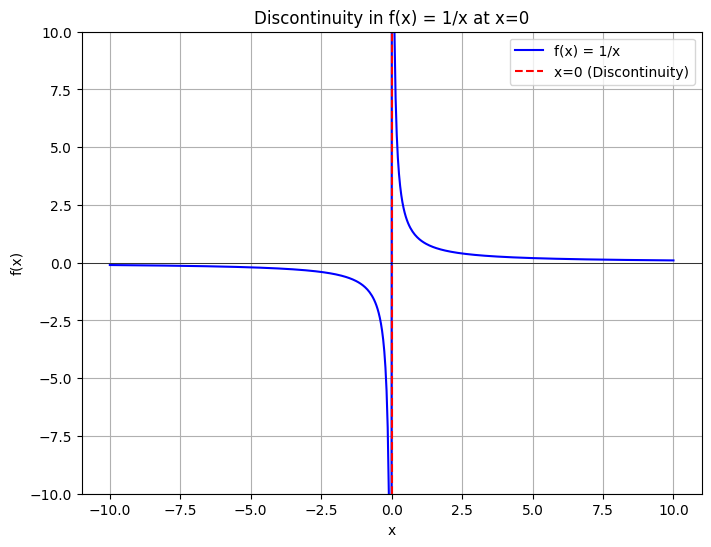

In [5]:
# Visualization of Discontinuity in f(x) = 1/x
import numpy as np
import matplotlib.pyplot as plt

# Define x values excluding x=0 to avoid division by zero
x_vals = np.linspace(-10, 10, 500)
x_vals = x_vals[x_vals != 0]

# Define function values
f_vals = 1 / x_vals

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_vals, label="f(x) = 1/x", color='blue')
plt.axvline(0, color='red', linestyle='--', label="x=0 (Discontinuity)")
plt.axhline(0, color='black', linewidth=0.5)
plt.ylim(-10, 10)  # Limit y-axis for better visibility
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Discontinuity in f(x) = 1/x at x=0")
plt.legend()
plt.grid(True)
plt.show()

**Example 3.2.2: Multivariable Limits**

Objective: Test limits in a multivariable context using SymPy.

In [3]:
# Multivariable Limit Calculation using SymPy
from sympy import symbols, limit, sqrt

# Define symbolic variables
x, y = symbols('x y')

# Define function
f = sqrt(x**2 + y**2)

# Compute limit as (x, y) -> (0, 0) along y=0
limit_along_y0 = limit(f.subs(y, 0), x, 0)
print(f"Limit as (x, y) -> (0, 0) along y=0: {limit_along_y0}")

# Compute limit as (x, y) -> (0, 0) along x=y
limit_along_xy = limit(f.subs(y, x), x, 0)
print(f"Limit as (x, y) -> (0, 0) along y=x: {limit_along_xy}")

# Compute limit as (x, y) -> (0, 0) using polar coordinates
from sympy import Symbol, pi, sin, cos

r = symbols('r', positive=True)
theta = symbols('theta')

# Express x and y in polar coordinates
x_polar = r * cos(theta)
y_polar = r * sin(theta)

# Rewrite function in polar coordinates
f_polar = sqrt(x_polar**2 + y_polar**2)
limit_polar = limit(f_polar, r, 0)
print(f"Limit as (x, y) -> (0, 0) using polar coordinates: {limit_polar}")

Limit as (x, y) -> (0, 0) along y=0: 0
Limit as (x, y) -> (0, 0) along y=x: 0
Limit as (x, y) -> (0, 0) using polar coordinates: 0


*Code Analysis*
1. Along $y = 0$:  The limit is 0.
2. Along $y = x$:  The limit is 0.
3. Using Polar Coordinates: The limit is 0, demonstrating that the limit exists and is the same along all paths.

**Example 3.2.3: Piecewise Function Continuity**

Objective: Analyse the continuity of a piecewise function:
* $f(x) = \begin{cases}
x^2 &; \text{if } x \leq 1 \\
2x + 1 &; \text{if } x > 1
\end{cases}$

In [4]:
# Continuity of a Piecewise Function using SymPy
from sympy import Piecewise

# Define symbolic variable
x = symbols('x')

# Define piecewise function
f_piecewise = Piecewise((x**2, x <= 1), (2*x + 1, x > 1))

# Compute limits at x=1
left_limit = limit(x**2, x, 1, dir='-')
right_limit = limit(2*x + 1, x, 1, dir='+')
f_at_1 = f_piecewise.subs(x, 1)

print(f"Left-hand limit as x -> 1: {left_limit}")
print(f"Right-hand limit as x -> 1: {right_limit}")
print(f"f(1): {f_at_1}")

# Check continuity at x=1
if left_limit == right_limit and right_limit == f_at_1:
    print("f(x) is continuous at x = 1")
else:
    print("Discontinuity detected at x = 1")

Left-hand limit as x -> 1: 1
Right-hand limit as x -> 1: 3
f(1): 1
Discontinuity detected at x = 1


*Code Analysis*
1. Left-hand limit as $x \to 1^-$: $1^2 = 1$
2. Right-hand limit as $x \to 1^+$: $2(1) + 1 = 3$
3. $f(1)$ : $1$

Since the left-hand and right-hand limits are not equal, $f(x)$ is discontinuous at $x=1$

**Example 3.2.3: Piecewise Function Continuity Visualisation**


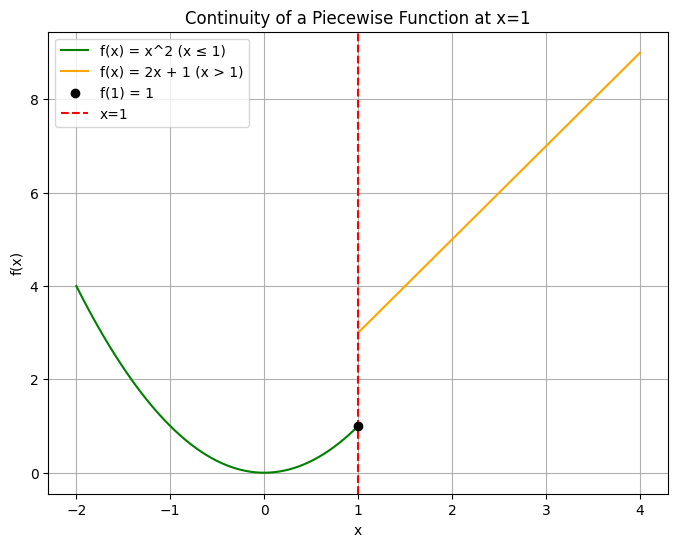

In [6]:
# Visualization of Continuity in a Piecewise Function
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x1 = np.linspace(-2, 1, 400)
x2 = np.linspace(1.01, 4, 400)

# Define function values
f1 = x1**2
f2 = 2 * x2 + 1

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(x1, f1, label="f(x) = x^2 (x ≤ 1)", color='green')
plt.plot(x2, f2, label="f(x) = 2x + 1 (x > 1)", color='orange')
plt.scatter(1, 1, color='black', zorder=5, label="f(1) = 1")
plt.axvline(1, color='red', linestyle='--', label="x=1")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Continuity of a Piecewise Function at x=1")
plt.legend()
plt.grid(True)
plt.show()

##**3.2.2: Derivatives**

**Definition 3.2.5**

The derivative of a function $f(x)$ at a point $𝑥$ measures the rate at which
$f(x)$ changes with respect to $𝑥$. Formally, it is defined as:
* $f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$

This represents the slope of the tangent line to the function at the point.

**Mathematical Intuition 3.2.6**

*Differentiation Rules*
1. Power Rule: $\frac{d}{dx} x^n = n \cdot x^{n-1}$
2. Product Rule: $\frac{d}{dx} [u(x) \cdot v(x)] = u'(x) \cdot v(x) + u(x) \cdot v'(x)$
3. Chain Rule: $\frac{d}{dx} f(g(x)) = f'(g(x)) \cdot g'(x)$

**Mathematical Intuition 3.2.7**
*Key Theorems*
1. Rolle’s Theorem:
* Statement: If $f(a) = f(b)$ and $f(x)$ is continuous on $[a, b]$ and differentiable on $(a, b)$, then there exists at least one $c \in (a, b)$ such that $f'(c) = 0$
* Implication: Guarantees the existence of a stationary point under certain conditions.

2. Mean Value Theorem (MVT):
* Statement: If $f(x)$ is continuous on $[a, b]$ and differentiable on $(a, b)$,then there exists at least one $c \in (a, b)$ such that $f'(c) = \frac{f(b) - f(a)}{b - a}$
* Implication: Provides a formal bridge between the derivative and the function's average rate of change.


**Example 3.2.4: Symbolic Differentiation**

In [7]:
# Symbolic Differentiation using SymPy
from sympy import symbols, diff, exp, cos

# Define symbolic variable
x = symbols('x')

# Define functions
functions = {
    "f1(x) = x**2": x**2,
    "f2(x) = exp(x)*cos(x)": exp(x)*cos(x),
}

# Compute symbolic derivatives
for name, func in functions.items():
    derivative = diff(func, x)
    print(f"\n{name}:")
    print(f"  Derivative: {derivative}")


f1(x) = x**2:
  Derivative: 2*x

f2(x) = exp(x)*cos(x):
  Derivative: -exp(x)*sin(x) + exp(x)*cos(x)


**Example 3.2.5: Numerical Differentiation**

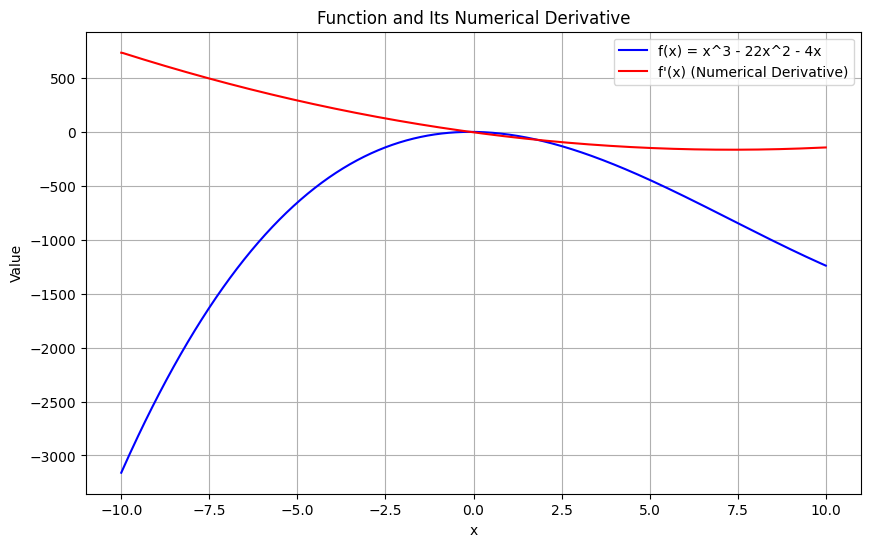

In [8]:
# Numerical Differentiation using NumPy
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x_vals = np.linspace(-10, 10, 500)

# Define function f(x) = x^3 - 22x^2 - 4x
f_vals = x_vals**3 - 22 * x_vals**2 - 4 * x_vals

# Compute numerical derivative using gradient
f_prime_vals = np.gradient(f_vals, x_vals)

# Plot the function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label="f(x) = x^3 - 22x^2 - 4x", color="blue")
plt.plot(x_vals, f_prime_vals, label="f'(x) (Numerical Derivative)", color="red")
plt.xlabel('x')
plt.ylabel('Value')
plt.title("Function and Its Numerical Derivative")
plt.legend()
plt.grid(True)
plt.show()

**Example 3.2.6: Partial Derivatives**

Objectives: Solve partial derivatives in the context of multivariable functions.
* $f(x, y) = x^2 + y^2$

In [9]:
# Partial Derivatives using SymPy
from sympy import symbols, diff

# Define symbolic variables
x, y = symbols('x y')

# Define function
f = x**2 + y**2

# Compute partial derivatives
df_dx = diff(f, x)
df_dy = diff(f, y)

print(f"Function: f(x, y) = {f}")
print(f"Partial Derivative with respect to x: {df_dx}")
print(f"Partial Derivative with respect to y: {df_dy}")

Function: f(x, y) = x**2 + y**2
Partial Derivative with respect to x: 2*x
Partial Derivative with respect to y: 2*y


**Example 3.2.7: Higher-Order Derivatives**

Objective: Compute the second derivative of a function to understand concavity
* $f(x) = e^x \cdot \sin(x)$

In [10]:
# Higher-Order Derivatives using SymPy
from sympy import symbols, diff, exp, sin

# Define symbolic variable
x = symbols('x')

# Define function
f = exp(x) * sin(x)

# Compute first and second derivatives
f_prime = diff(f, x)
f_double_prime = diff(f_prime, x)

print(f"Function: f(x) = {f}")
print(f"First Derivative: f'(x) = {f_prime}")
print(f"Second Derivative: f''(x) = {f_double_prime}")

Function: f(x) = exp(x)*sin(x)
First Derivative: f'(x) = exp(x)*sin(x) + exp(x)*cos(x)
Second Derivative: f''(x) = 2*exp(x)*cos(x)


**Numerical vs. Symbolic Derivatives Visualisation**

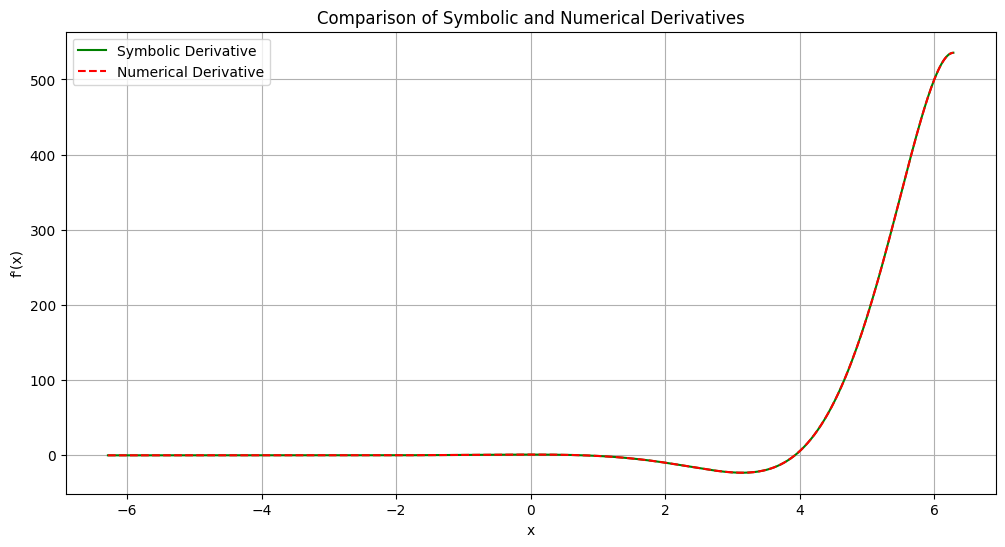

In [11]:
# Comparison of Numerical and Symbolic Derivatives
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, sin, exp, cos

# Define symbolic variable
x_sym = symbols('x')

# Define function and symbolic derivative
f_sym = exp(x_sym) * cos(x_sym)
f_prime_sym = diff(f_sym, x_sym)

# Convert symbolic functions to numerical functions
f_num = lambdify(x_sym, f_sym, 'numpy')
f_prime_num = lambdify(x_sym, f_prime_sym, 'numpy')

# Define x values
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 500)
f_vals = f_num(x_vals)
f_prime_vals_symbolic = f_prime_num(x_vals)

# Compute numerical derivative
f_prime_vals_numerical = np.gradient(f_vals, x_vals)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(x_vals, f_prime_vals_symbolic, label="Symbolic Derivative", color="green")
plt.plot(x_vals, f_prime_vals_numerical, label="Numerical Derivative", color="red", linestyle='--')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Comparison of Symbolic and Numerical Derivatives")
plt.legend()
plt.grid(True)
plt.show()

##**3.2.3: Taylor’s Theorem**

**Definition 3.2.8**

*Taylor Expansion:*

Taylor's theorem provides a way to approximate complex functions using polynomials. The Taylor series of a function $f(x)$ around a point $a$ is given by:
* $f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \dots$

The n-th degree Taylor polynomial is the sum of the first $n+1$ terms of the Taylor series.

**Mathematical Intuition 3.2.9**

*Applications:*
1. Function Approximations: Simplifying complex functions for analysis and computation.
2. Error Bounds: Estimating the difference between the actual function and its polynomial approximation.
3. Numerical Methods: Facilitating the implementation of algorithms that require smooth function approximations.

**Definition 3.2.10**

*Taylor’s Theorem Statement*

If $f(x)$ is $n+1$ times differentiable at $a$, then for each $x$:
* $f(x) = P_n(x) + R_n(x)$

Where, $P_n(x)$ is the n-th degree Taylor polynomial, and $R_n(x)$ is the remainder term, which satisfies:
* $|R_n(x)| \leq \frac{M}{(n+1)!} |x - a|^{n+1}$

For some constant $M$ depending on $f$ and $n$.

**Example 3.2.8: Taylor Series Approximation**

Objective: Use SymPy to compute the Taylor series of $f(x) = e^x$ around $a=0$ up to the 5th degree.

In [12]:
# Taylor Series Approximation using SymPy
from sympy import symbols, series, exp, sin, cos

# Define symbolic variable
x = symbols('x')

# Define function
f = exp(x)

# Compute Taylor series around x=0 up to degree 5
taylor_series = series(f, x, 0, 6)  # 6 to include x^5 term
print(f"Taylor Series Approximation for e^x around x=0 (up to x^5):\n{taylor_series}")

Taylor Series Approximation for e^x around x=0 (up to x^5):
1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)


**Example 3.2.9: Taylor Series of Trignometry**

Objective: Compute the Taylor series of $f(x) = \sin(x)$ around $a = 0$ up to the 7th degree

In [13]:
# Taylor Series for sin(x) using SymPy
from sympy import symbols, series, sin

# Define symbolic variable
x = symbols('x')

# Define function
f = sin(x)

# Compute Taylor series around x=0 up to degree 7
taylor_series_sin = series(f, x, 0, 8)  # 8 to include x^7 term
print(f"Taylor Series Approximation for sin(x) around x=0 (up to x^7):\n{taylor_series_sin}")

Taylor Series Approximation for sin(x) around x=0 (up to x^7):
x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


**Example 3.2.10: Taylor Series Approximation of $e^x$**

Objective: Visualize the Taylor series approximation of $e^x$ and compare it with the actual function

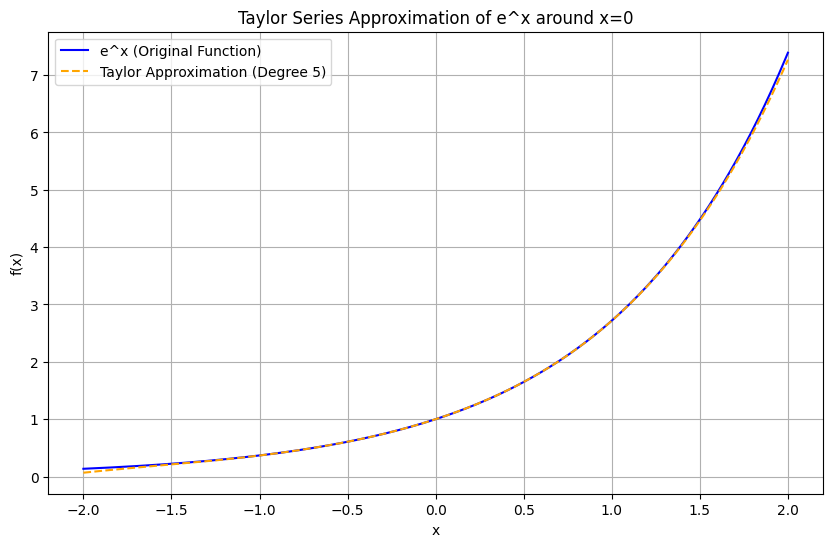

In [14]:
# Visualization of Taylor Series Approximation for e^x
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, series, lambdify, exp

# Define symbolic variable
x_sym = symbols('x')

# Define function and compute Taylor series
f_sym = exp(x_sym)
taylor_series_sym = series(f_sym, x_sym, 0, 6).removeO()

# Convert symbolic expressions to numerical functions
f_num = lambdify(x_sym, f_sym, 'numpy')
taylor_num = lambdify(x_sym, taylor_series_sym, 'numpy')

# Define x values
x_vals = np.linspace(-2, 2, 400)
f_vals = f_num(x_vals)
taylor_vals = taylor_num(x_vals)

# Plot the function and its Taylor approximation
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label="e^x (Original Function)", color="blue")
plt.plot(x_vals, taylor_vals, label="Taylor Approximation (Degree 5)", color="orange", linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Taylor Series Approximation of e^x around x=0")
plt.legend()
plt.grid(True)
plt.show()